<a href="https://colab.research.google.com/github/azal17/MobilenetV3/blob/main/MobilenetV3_stl10ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STL10

258 batch size
100 epochs

In [ ]:
!python /content/MobileNetV3-Pytorch/main.py

Files already downloaded and verified
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Files already downloaded and verified
num_classes:  10
num GPUs:  1
init model load ...
Epoch: [1][ 0/20]	Time  4.882 ( 4.882)	Data  1.915 ( 1.915)	Loss 2.5028e+00 (2.5028e+00)	Acc@1   9.38 (  9.38)	Acc@5  48.83 ( 48.83)
Epoch: [1][ 5/20]	Time  0.966 ( 1.536)	Data  0.131 ( 0.429)	Loss 2.2798e+00 (2.3251e+00)	Acc@1  18.36 ( 14.52)	Acc@5  72.27 ( 61.98)
Epoch: [1][10/20]	Time  0.850 ( 1.239)	Data  0.087 ( 0.324)	Loss 2.1085e+00 (2.2637e+00)	Acc@1  21.09 ( 16.48)	Acc@5  77.34 ( 68.57)


In [ ]:
import torch

checkpoint = torch.load("/content/checkpoint/stlLARGE_ckpt.t7")
model_state_dict = checkpoint['model']
print (model_state_dict)

OrderedDict([('module.init_conv.0.weight', tensor([[[[-0.2607, -0.2517, -0.0397],
          [-0.0643,  0.0855, -0.0795],
          [-0.0827, -0.0423,  0.2230]],

         [[-0.1041, -0.0738, -0.0230],
          [-0.2533, -0.2411,  0.0572],
          [ 0.1869, -0.1394,  0.1160]],

         [[-0.2454, -0.1889, -0.1508],
          [ 0.0038, -0.2061, -0.0545],
          [-0.0219, -0.1980,  0.1434]]],


        [[[ 0.2902,  0.4476,  0.2402],
          [ 0.2617,  0.5078,  0.2253],
          [ 0.4061,  0.5552,  0.4405]],

         [[ 0.1504,  0.0481,  0.0975],
          [ 0.3516,  0.1188,  0.3933],
          [ 0.3390,  0.4585,  0.4911]],

         [[ 0.3588,  0.2500,  0.1273],
          [ 0.5800,  0.3930,  0.1968],
          [ 0.3878,  0.4845,  0.4102]]],


        [[[-0.7045, -0.8137, -0.6505],
          [-0.7826, -0.7819, -0.6470],
          [-0.6168, -0.3851, -0.4367]],

         [[-0.6588, -0.7015, -0.5561],
          [-0.5321, -0.5460, -0.7434],
          [-0.2782, -0.1695, -0.0906]],

 

In [ ]:
with open("/content/reporting/stlLARGE.txt", "r") as file:
    data = file.read()
    print(data)

Epoch: 1  Best acc: tensor(9.9750, device='cuda:0') Test acc: tensor(9.9750, device='cuda:0')
Training time: 42.23448348045349 Hour: 0 Minute: 0 Second: 42
Epoch: 2  Best acc: tensor(11.9375, device='cuda:0') Test acc: tensor(11.9375, device='cuda:0')
Training time: 81.39857602119446 Hour: 0 Minute: 1 Second: 21
Epoch: 3  Best acc: tensor(14.8000, device='cuda:0') Test acc: tensor(14.8000, device='cuda:0')
Training time: 120.47120094299316 Hour: 0 Minute: 2 Second: 0
Epoch: 4  Best acc: tensor(35.3000, device='cuda:0') Test acc: tensor(35.3000, device='cuda:0')
Training time: 159.98588728904724 Hour: 0 Minute: 2 Second: 39
Epoch: 5  Best acc: tensor(35.3000, device='cuda:0') Test acc: tensor(31.7625, device='cuda:0')
Training time: 199.53006672859192 Hour: 0 Minute: 3 Second: 19
Epoch: 6  Best acc: tensor(35.3750, device='cuda:0') Test acc: tensor(35.3750, device='cuda:0')
Training time: 238.92903017997742 Hour: 0 Minute: 3 Second: 58
Epoch: 7  Best acc: tensor(42.7375, device='cuda:0'

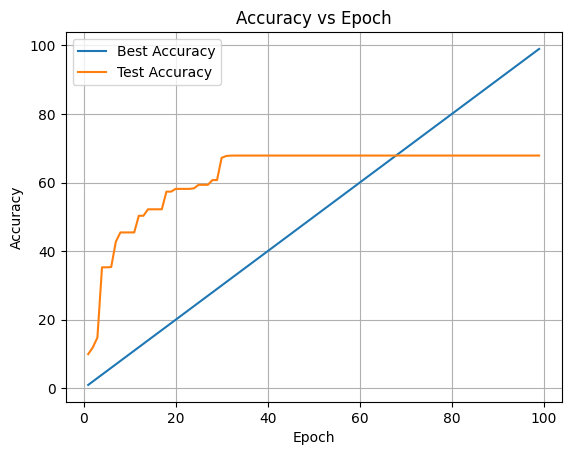

In [ ]:
import re
import matplotlib.pyplot as plt

# Initialize lists to store epoch numbers, best accuracies, and test accuracies
epochs = []
best_accuracies = []
test_accuracies = []

# Read the contents of the file
with open("/content/reporting/stlLARGE.txt", "r") as f:
    lines = f.readlines()

# Define regex pattern to extract floating-point numbers
pattern = r'[-+]?\d*\.\d+|\d+'

# Parse the lines and extract relevant information
for line in lines:
    if "Best acc:" in line and "Test acc:" in line:
        # Extract epoch number
        epoch = int(re.findall(r'\d+', line)[0])
        epochs.append(epoch)

        # Extract best accuracy and test accuracy using regex
        best_accuracy = float(re.findall(pattern, line)[0])
        test_accuracy = float(re.findall(pattern, line)[1])

        best_accuracies.append(best_accuracy)
        test_accuracies.append(test_accuracy)

# Plotting
plt.plot(epochs, best_accuracies, label='Best Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.legend()
plt.grid(True)
plt.show()


preprocess.py

In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import os

def load_data(args):
    if args.dataset_mode == "CIFAR100":
        transform_train = transforms.Compose([
            transforms.Resize(224),
            transforms.RandomCrop(224, padding=4),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize((0.5071, 0.4865, 0.4409), (0.2673, 0.2564, 0.2762)),
        ])

        transform_test = transforms.Compose([
            transforms.Resize(224),
            transforms.ToTensor(),
            transforms.Normalize((0.5071, 0.4865, 0.4409), (0.2673, 0.2564, 0.2762)),
        ])
        train_loader = torch.utils.data.DataLoader(
            datasets.CIFAR100('data', train=True, download=True, transform=transform_train),
            batch_size=args.batch_size,
            shuffle=True,
            num_workers=args.workers
        )

        test_loader = torch.utils.data.DataLoader(
            datasets.CIFAR100('data', train=False, transform=transform_test),
            batch_size=args.batch_size,
            shuffle=False,
            num_workers=args.workers
        )
    elif args.dataset_mode == "CIFAR10":
        transform_train = transforms.Compose([
            transforms.Resize(224),
            transforms.RandomCrop(224, padding=4),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
        ])

        transform_test = transforms.Compose([
            transforms.Resize(224),
            transforms.ToTensor(),
            transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
        ])
        train_loader = torch.utils.data.DataLoader(
            datasets.CIFAR10('data', train=True, download=True, transform=transform_train),
            batch_size=args.batch_size,
            shuffle=True,
            num_workers=args.workers
        )

        test_loader = torch.utils.data.DataLoader(
            datasets.CIFAR10('data', train=False, transform=transform_test),
            batch_size=args.batch_size,
            shuffle=False,
            num_workers=args.workers
        )

    elif args.dataset_mode == "IMAGENET":
        traindir = os.path.join(args.data, 'train')
        valdir = os.path.join(args.data, 'val')

        normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])

        train_dataset = datasets.ImageFolder(
            traindir,
            transforms.Compose([
                transforms.RandomResizedCrop(224),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                normalize,
            ]))

        if args.distributed:
            train_sampler = torch.utils.data.distributed.DistributedSampler(train_dataset)
        else:
            train_sampler = None

        train_loader = torch.utils.data.DataLoader(
            train_dataset,
            batch_size=args.batch_size,
            shuffle=(train_sampler is None),
            num_workers=args.workers,
            pin_memory=True,
            sampler=train_sampler
        )

        test_loader = torch.utils.data.DataLoader(
            datasets.ImageFolder(valdir, transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                normalize,
            ])),
            batch_size=args.batch_size,
            shuffle=False,
            num_workers=args.workers,
            pin_memory=True
        )

    elif args.dataset_mode == "STL10":
        transform_train = transforms.Compose([
            transforms.Resize(224),
            transforms.RandomCrop(224, padding=4),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
        ])

        transform_test = transforms.Compose([
            transforms.Resize(224),
            transforms.ToTensor(),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
        ])

        train_loader = torch.utils.data.DataLoader(
            datasets.STL10('data', split='train', download=True, transform=transform_train),
            batch_size=args.batch_size,
            shuffle=True,
            num_workers=args.workers
        )

        test_loader = torch.utils.data.DataLoader(
            datasets.STL10('data', split='test', download=True, transform=transform_test),
            batch_size=args.batch_size,
            shuffle=False,
            num_workers=args.workers
        )

    return train_loader, test_loader


model.py

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


def get_model_parameters(model):
    total_parameters = 0
    for layer in list(model.parameters()):
        layer_parameter = 1
        for l in list(layer.size()):
            layer_parameter *= l
        total_parameters += layer_parameter
    return total_parameters


def _weights_init(m):
    if isinstance(m, nn.Conv2d):
        torch.nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            torch.nn.init.zeros_(m.bias)
    elif isinstance(m, nn.BatchNorm2d):
        m.weight.data.fill_(1)
        m.bias.data.zero_()
    elif isinstance(m, nn.Linear):
        n = m.weight.size(1)
        m.weight.data.normal_(0, 0.01)
        m.bias.data.zero_()


class h_sigmoid(nn.Module):
    def __init__(self, inplace=True):
        super(h_sigmoid, self).__init__()
        self.inplace = inplace

    def forward(self, x):
        return F.relu6(x + 3., inplace=self.inplace) / 6.


class h_swish(nn.Module):
    def __init__(self, inplace=True):
        super(h_swish, self).__init__()
        self.inplace = inplace

    def forward(self, x):
        out = F.relu6(x + 3., self.inplace) / 6.
        return out * x


def _make_divisible(v, divisor=8, min_value=None):
    if min_value is None:
        min_value = divisor
    new_v = max(min_value, int(v + divisor / 2) // divisor * divisor)
    # Make sure that round down does not go down by more than 10%.
    if new_v < 0.9 * v:
        new_v += divisor
    return new_v


class SqueezeBlock(nn.Module):
    def __init__(self, exp_size, divide=4):
        super(SqueezeBlock, self).__init__()
        self.dense = nn.Sequential(
            nn.Linear(exp_size, exp_size // divide),
            nn.ReLU(inplace=True),
            nn.Linear(exp_size // divide, exp_size),
            h_sigmoid()
        )

    def forward(self, x):
        batch, channels, height, width = x.size()
        out = F.avg_pool2d(x, kernel_size=[height, width]).view(batch, -1)
        out = self.dense(out)
        out = out.view(batch, channels, 1, 1)
        # out = hard_sigmoid(out)

        return out * x


class MobileBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernal_size, stride, nonLinear, SE, exp_size):
        super(MobileBlock, self).__init__()
        self.out_channels = out_channels
        self.nonLinear = nonLinear
        self.SE = SE
        padding = (kernal_size - 1) // 2

        self.use_connect = stride == 1 and in_channels == out_channels

        if self.nonLinear == "RE":
            activation = nn.ReLU
        else:
            activation = h_swish

        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, exp_size, kernel_size=1, stride=1, padding=0, bias=False),
            nn.BatchNorm2d(exp_size),
            activation(inplace=True)
        )
        self.depth_conv = nn.Sequential(
            nn.Conv2d(exp_size, exp_size, kernel_size=kernal_size, stride=stride, padding=padding, groups=exp_size),
            nn.BatchNorm2d(exp_size),
        )

        if self.SE:
            self.squeeze_block = SqueezeBlock(exp_size)

        self.point_conv = nn.Sequential(
            nn.Conv2d(exp_size, out_channels, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(out_channels),
            activation(inplace=True)
        )

    def forward(self, x):
        # MobileNetV2
        out = self.conv(x)
        out = self.depth_conv(out)

        # Squeeze and Excite
        if self.SE:
            out = self.squeeze_block(out)

        # point-wise conv
        out = self.point_conv(out)

        # connection
        if self.use_connect:
            return x + out
        else:
            return out


class MobileNetV3(nn.Module):
    def __init__(self, model_mode="LARGE", num_classes=10, multiplier=1.0, dropout_rate=0.0):
        super(MobileNetV3, self).__init__()
        self.num_classes = num_classes

        if model_mode == "LARGE":
            layers = [
                [16, 16, 3, 1, "RE", False, 16],
                [16, 24, 3, 2, "RE", False, 64],
                [24, 24, 3, 1, "RE", False, 72],
                [24, 40, 5, 2, "RE", True, 72],
                [40, 40, 5, 1, "RE", True, 120],

                [40, 40, 5, 1, "RE", True, 120],
                [40, 80, 3, 2, "HS", False, 240],
                [80, 80, 3, 1, "HS", False, 200],
                [80, 80, 3, 1, "HS", False, 184],
                [80, 80, 3, 1, "HS", False, 184],

                [80, 112, 3, 1, "HS", True, 480],
                [112, 112, 3, 1, "HS", True, 672],
                [112, 160, 5, 1, "HS", True, 672],
                [160, 160, 5, 2, "HS", True, 672],
                [160, 160, 5, 1, "HS", True, 960],
            ]
            init_conv_out = _make_divisible(16 * multiplier)
            self.init_conv = nn.Sequential(
                nn.Conv2d(in_channels=3, out_channels=init_conv_out, kernel_size=3, stride=2, padding=1),
                nn.BatchNorm2d(init_conv_out),
                h_swish(inplace=True),
            )

            self.block = []
            for in_channels, out_channels, kernal_size, stride, nonlinear, se, exp_size in layers:
                in_channels = _make_divisible(in_channels * multiplier)
                out_channels = _make_divisible(out_channels * multiplier)
                exp_size = _make_divisible(exp_size * multiplier)
                self.block.append(MobileBlock(in_channels, out_channels, kernal_size, stride, nonlinear, se, exp_size))
            self.block = nn.Sequential(*self.block)

            out_conv1_in = _make_divisible(160 * multiplier)
            out_conv1_out = _make_divisible(960 * multiplier)
            self.out_conv1 = nn.Sequential(
                nn.Conv2d(out_conv1_in, out_conv1_out, kernel_size=1, stride=1),
                nn.BatchNorm2d(out_conv1_out),
                h_swish(inplace=True),
            )

            out_conv2_in = _make_divisible(960 * multiplier)
            out_conv2_out = _make_divisible(1280 * multiplier)
            self.out_conv2 = nn.Sequential(
                nn.Conv2d(out_conv2_in, out_conv2_out, kernel_size=1, stride=1),
                h_swish(inplace=True),
                nn.Dropout(dropout_rate),
                nn.Conv2d(out_conv2_out, self.num_classes, kernel_size=1, stride=1),
            )

        elif model_mode == "SMALL":
            layers = [
                [16, 16, 3, 2, "RE", True, 16],
                [16, 24, 3, 2, "RE", False, 72],
                [24, 24, 3, 1, "RE", False, 88],
                [24, 40, 5, 2, "RE", True, 96],
                [40, 40, 5, 1, "RE", True, 240],
                [40, 40, 5, 1, "RE", True, 240],
                [40, 48, 5, 1, "HS", True, 120],
                [48, 48, 5, 1, "HS", True, 144],
                [48, 96, 5, 2, "HS", True, 288],
                [96, 96, 5, 1, "HS", True, 576],
                [96, 96, 5, 1, "HS", True, 576],
            ]

            init_conv_out = _make_divisible(16 * multiplier)
            self.init_conv = nn.Sequential(
                nn.Conv2d(in_channels=3, out_channels=init_conv_out, kernel_size=3, stride=2, padding=1),
                nn.BatchNorm2d(init_conv_out),
                h_swish(inplace=True),
            )

            self.block = []
            for in_channels, out_channels, kernal_size, stride, nonlinear, se, exp_size in layers:
                in_channels = _make_divisible(in_channels * multiplier)
                out_channels = _make_divisible(out_channels * multiplier)
                exp_size = _make_divisible(exp_size * multiplier)
                self.block.append(MobileBlock(in_channels, out_channels, kernal_size, stride, nonlinear, se, exp_size))
            self.block = nn.Sequential(*self.block)

            out_conv1_in = _make_divisible(96 * multiplier)
            out_conv1_out = _make_divisible(576 * multiplier)
            self.out_conv1 = nn.Sequential(
                nn.Conv2d(out_conv1_in, out_conv1_out, kernel_size=1, stride=1),
                SqueezeBlock(out_conv1_out),
                nn.BatchNorm2d(out_conv1_out),
                h_swish(inplace=True),
            )

            out_conv2_in = _make_divisible(576 * multiplier)
            out_conv2_out = _make_divisible(1280 * multiplier)
            self.out_conv2 = nn.Sequential(
                nn.Conv2d(out_conv2_in, out_conv2_out, kernel_size=1, stride=1),
                h_swish(inplace=True),
                nn.Dropout(dropout_rate),
                nn.Conv2d(out_conv2_out, self.num_classes, kernel_size=1, stride=1),
            )

        self.apply(_weights_init)

    def forward(self, x):
        out = self.init_conv(x)
        out = self.block(out)
        out = self.out_conv1(out)
        batch, channels, height, width = out.size()
        out = F.avg_pool2d(out, kernel_size=[height, width])
        out = self.out_conv2(out).view(batch, -1)
        return out


# temp = torch.zeros((1, 3, 224, 224))
# model = MobileNetV3(model_mode="LARGE", num_classes=1000, multiplier=1.0)
# print(model(temp).shape)
# print(get_model_parameters(model))


In [ ]:
main.py

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

from preprocess import load_data
from model import MobileNetV3

import argparse
from tqdm import tqdm
import time
import os

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")


def get_args():
    parser = argparse.ArgumentParser("parameters")

    parser.add_argument("--dataset-mode", type=str, default="STL10", help="(example: CIFAR10, CIFAR100, IMAGENET), (default: IMAGENET)")
    parser.add_argument("--epochs", type=int, default=100, help="number of epochs, (default: 100)")
    parser.add_argument("--batch-size", type=int, default=258, help="number of batch size, (default, 512)")
    parser.add_argument("--learning-rate", type=float, default=1e-1, help="learning_rate, (default: 1e-1)")
    parser.add_argument("--dropout", type=float, default=0.8, help="dropout rate, not implemented yet, (default: 0.8)")
    parser.add_argument('--model-mode', type=str, default="LARGE", help="(example: LARGE, SMALL), (default: LARGE)")
    parser.add_argument("--load-pretrained", type=bool, default=False, help="(default: False)")
    parser.add_argument('--evaluate', type=bool, default=False, help="Testing time: True, (default: False)")
    parser.add_argument('--multiplier', type=float, default=1.0, help="(default: 1.0)")
    parser.add_argument('--print-interval', type=int, default=5, help="training information and evaluation information output frequency, (default: 5)")
   #parser.add_argument('--data', default='D:/ILSVRC/Data/CLS-LOC')
    parser.add_argument('--workers', type=int, default=4)
    parser.add_argument('--distributed', type=bool, default=False)

    args = parser.parse_args()

    return args


def adjust_learning_rate(optimizer, epoch, args):
    """Sets the learning rate to the initial LR decayed by 10 every 30 epochs"""
    lr = args.learning_rate * (0.1 ** (epoch // 30))
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr


# reference,
# https://github.com/pytorch/examples/blob/master/imagenet/main.py
# Thank you.
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self, name, fmt=':f'):
        self.name = name
        self.fmt = fmt
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

    def __str__(self):
        fmtstr = '{name} {val' + self.fmt + '} ({avg' + self.fmt + '})'
        return fmtstr.format(**self.__dict__)


def train(train_loader, model, criterion, optimizer, epoch, args):
    batch_time = AverageMeter('Time', ':6.3f')
    data_time = AverageMeter('Data', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    top1 = AverageMeter('Acc@1', ':6.2f')
    top5 = AverageMeter('Acc@5', ':6.2f')
    progress = ProgressMeter(len(train_loader), batch_time, data_time, losses, top1, top5, prefix="Epoch: [{}]".format(epoch))

    # switch to train mode
    model.train()

    end = time.time()
    for i, (data, target) in enumerate(train_loader):
        # measure data loading time
        data_time.update(time.time() - end)
        data, target = data.to(device), target.to(device)

        # if args.gpu is not None:
        #     data = data.cuda(args.gpu, non_blocking=True)
        # target = target.cuda(args.gpu, non_blocking=True)

        # compute output
        output = model(data)
        loss = criterion(output, target)

        # measure accuracy and record loss
        acc1, acc5 = accuracy(output, target, topk=(1, 5))
        losses.update(loss.item(), data.size(0))
        top1.update(acc1[0], data.size(0))
        top5.update(acc5[0], data.size(0))

        # compute gradient and do SGD step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if i % args.print_interval == 0:
            progress.print(i)


def validate(val_loader, model, criterion, args):
    batch_time = AverageMeter('Time', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    top1 = AverageMeter('Acc@1', ':6.2f')
    top5 = AverageMeter('Acc@5', ':6.2f')
    progress = ProgressMeter(len(val_loader), batch_time, losses, top1, top5,
                             prefix='Test: ')

    # switch to evaluate mode
    model.eval()
    with torch.no_grad():
        end = time.time()
        for i, (data, target) in enumerate(val_loader):
            # if args.gpu is not None:
            #     input = input.cuda(args.gpu, non_blocking=True)
            # target = target.cuda(args.gpu, non_blocking=True)
            data, target = data.to(device), target.to(device)

            # compute output
            output = model(data)
            loss = criterion(output, target)

            # measure accuracy and record loss
            acc1, acc5 = accuracy(output, target, topk=(1, 5))
            losses.update(loss.item(), data.size(0))
            top1.update(acc1[0], data.size(0))
            top5.update(acc5[0], data.size(0))

            # measure elapsed time
            batch_time.update(time.time() - end)
            end = time.time()

            if i % args.print_interval == 0:
                progress.print(i)

        # TODO: this should also be done with the ProgressMeter
        print(' * Acc@1 {top1.avg:.3f} Acc@5 {top5.avg:.3f}'
              .format(top1=top1, top5=top5))

    return top1.avg, top5.avg


class ProgressMeter(object):
    def __init__(self, num_batches, *meters, prefix=""):
        self.batch_fmtstr = self._get_batch_fmtstr(num_batches)
        self.meters = meters
        self.prefix = prefix

    def print(self, batch):
        entries = [self.prefix + self.batch_fmtstr.format(batch)]
        entries += [str(meter) for meter in self.meters]
        print('\t'.join(entries))

    def _get_batch_fmtstr(self, num_batches):
        num_digits = len(str(num_batches // 1))
        fmt = '{:' + str(num_digits) + 'd}'
        return '[' + fmt + '/' + fmt.format(num_batches) + ']'


def accuracy(output, target, topk=(1,)):
    """Computes the accuracy over the k top predictions for the specified values of k"""
    with torch.no_grad():
        maxk = max(topk)
        batch_size = target.size(0)

        _, pred = output.topk(maxk, 1, True, True)
        pred = pred.t()
        correct = pred.eq(target.view(1, -1).expand_as(pred))

        res = []
        for k in topk:
            correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
            res.append(correct_k.mul_(100.0 / batch_size))
        return res


def main():
    args = get_args()
    train_loader, test_loader = load_data(args)

    if args.dataset_mode == "CIFAR10":
        num_classes = 10
    elif args.dataset_mode == "CIFAR100":
        num_classes = 100
    elif args.dataset_mode == "IMAGENET":
        num_classes = 1000
    elif args.dataset_mode == "STL10":
        num_classes = 10
    print('num_classes: ', num_classes)

    model = MobileNetV3(model_mode=args.model_mode, num_classes=num_classes, multiplier=args.multiplier, dropout_rate=args.dropout).to(device)
    if torch.cuda.device_count() >= 1:
        print("num GPUs: ", torch.cuda.device_count())
        model = nn.DataParallel(model).to(device)

    if args.load_pretrained or args.evaluate:
        filename = "best_model_" + str(args.model_mode)
        checkpoint = torch.load('./checkpoint/' + filename + '_ckpt.t7')
        model.load_state_dict(checkpoint['model'])
        epoch = checkpoint['epoch']
        acc1 = checkpoint['best_acc1']
        acc5 = checkpoint['best_acc5']
        best_acc1 = acc1
        print("Load Model Accuracy1: ", acc1, " acc5: ", acc5, "Load Model end epoch: ", epoch)
    else:
        print("init model load ...")
        epoch = 1
        best_acc1 = 0

    optimizer = optim.SGD(model.parameters(), lr=args.learning_rate, weight_decay=1e-5, momentum=0.9)
    # optimizer = optim.RMSprop(model.parameters(), lr=args.learning_rate, momentum=0.9, weight_decay=1e-5)
    criterion = nn.CrossEntropyLoss().to(device)

    if args.evaluate:
        acc1, acc5 = validate(test_loader, model, criterion, args)
        print("Acc1: ", acc1, "Acc5: ", acc5)
        return

    if not os.path.isdir("reporting"):
        os.mkdir("reporting")

    start_time = time.time()
    with open("./reporting/" + "best_model_" + args.model_mode + ".txt", "w") as f:
        for epoch in range(epoch, args.epochs):
            adjust_learning_rate(optimizer, epoch, args)
            train(train_loader, model, criterion, optimizer, epoch, args)
            acc1, acc5 = validate(test_loader, model, criterion, args)

            is_best = acc1 > best_acc1
            best_acc1 = max(acc1, best_acc1)

            if is_best:
                print('Saving..')
                best_acc5 = acc5
                state = {
                    'model': model.state_dict(),
                    'best_acc1': best_acc1,
                    'best_acc5': best_acc5,
                    'epoch': epoch,
                }
                if not os.path.isdir('checkpoint'):
                    os.mkdir('checkpoint')
                filename = "best_model_" + str(args.model_mode)
                torch.save(state, './checkpoint/' + filename + '_ckpt.t7')

            time_interval = time.time() - start_time
            time_split = time.gmtime(time_interval)
            print("Training time: ", time_interval, "Hour: ", time_split.tm_hour, "Minute: ", time_split.tm_min, "Second: ", time_split.tm_sec, end='')
            print(" Test best acc1:", best_acc1, " acc1: ", acc1, " acc5: ", acc5)

            f.write("Epoch: " + str(epoch) + " " + " Best acc: " + str(best_acc1) + " Test acc: " + str(acc1) + "\n")
            f.write("Training time: " + str(time_interval) + " Hour: " + str(time_split.tm_hour) + " Minute: " + str(
                time_split.tm_min) + " Second: " + str(time_split.tm_sec))
            f.write("\n")


if __name__ == "__main__":
    main()
